In [ ]:
import torchfile
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
HOME_PATH = os.path.expanduser('~')

In [3]:
SegmPredDataPath = os.path.join(HOME_PATH, 'Data/SegmPred/Data/train')

In [4]:
SegmPredDataBatchPath = os.path.join(SegmPredDataPath, 'batch_10.t7')

In [5]:
SegmPredDataBatch = torchfile.load(SegmPredDataBatchPath)

In [6]:
SegmPredDataBatch.keys()

['R8s', 'RGBs']

In [7]:
pred_sequences_segment = SegmPredDataBatch['R8s'][0]

In [8]:
pred_sequences_segment.shape

(5, 19, 64, 64)

In [9]:
pred_sequences_segment_result = np.argmax(pred_sequences_segment, axis=1)

In [10]:
np.unique(pred_sequences_segment_result)

array([ 0,  1,  2,  5,  6,  7,  8,  9, 11, 13, 16])

In [11]:
pred_sequences_segment_result.shape

(5, 64, 64)

In [12]:
# 99 sample training batches of 4 sequences x 5 frames (4 inputs + 1 target) x 64 x 64.
pred_sequences = SegmPredDataBatch['RGBs'][0]

In [13]:
pred_sequences.shape

(5, 3, 64, 64)

In [ ]:
pred_sequences = pred_sequences.transpose(0, 2, 3, 1)

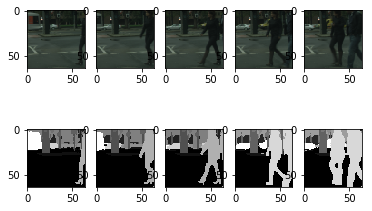

In [15]:
for index in range(5):
    plt.subplot(2, 5, index+1)
    plt.imshow(pred_sequences[index])
for index in range(5):
    plt.subplot(2, 5, 5 + index+1)
    plt.imshow(pred_sequences_segment_result[index], cmap='gray')
plt.show()